In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

math_students = pd.read_csv('student/student-mat.csv', sep = ';')
por_students = pd.read_csv('student/student-por.csv', sep = ';')

# Hipotezy
- Długie dojazdy do szkoły pogarszają wyniki w nauce
- Duża liczba nieobecności wpływa niekorzystnie na wyniki
- Osoby z miasta częściej chcą zdobyć wyższe wykształcenie
- Osoby młodsze piją mniej alkoholu
- Uczeń otrzymuje lepsze wyniki jeżeli jego rodzic jest nauczycielem

## Długie dojazdy do szkoły pogarszają wyniki w nauce

<function matplotlib.pyplot.show(*args, **kw)>

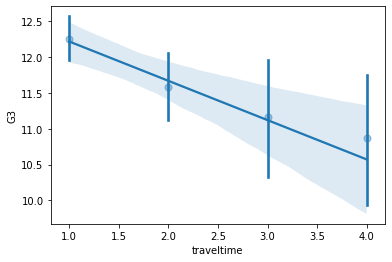

In [12]:
sns.regplot(data=por_students, y="G3", x="traveltime", x_estimator=np.mean, y_jitter=0.1, x_jitter=0.3, scatter_kws={'alpha':0.4})
plt.show

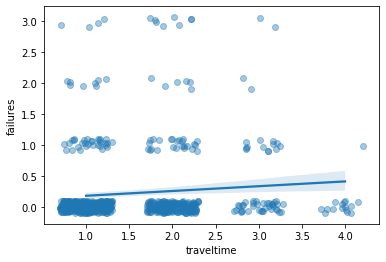

In [13]:
sns.regplot(data=por_students, y="failures", x="traveltime", y_jitter=0.1, x_jitter=0.3, scatter_kws={'alpha':0.4})

### Wniosek
Isnieje niewielka corelacja pomiędzy czasem dojazdu a wynikami uczniów, więc hipoteza może okazać się prawdziwa. Problem może stanowić mała liczba uczniów mieszkających daleko od szkoły, ich wyniki mogą psuć nasze wnioski 

## Duża liczba nieobecności wpływa niekorzystnie na wyniki

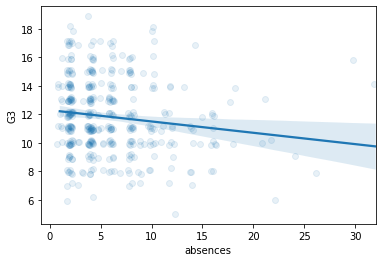

In [14]:
sns.regplot(data=por_students[(por_students.absences != 0) & (por_students.G3 != 0)], y="G3", x="absences", y_jitter=0.2, x_jitter=0.3, scatter_kws={'alpha':0.1})

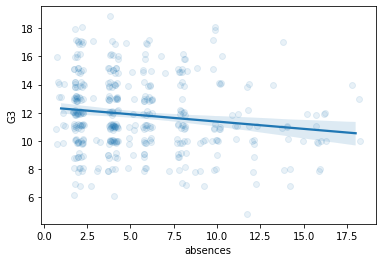

In [15]:
sns.regplot(data=por_students[(por_students['absences'] < 20) & (por_students.absences != 0) & (por_students.G3 != 0)]
            , y="G3", x="absences", y_jitter=0.2, x_jitter=0.3, scatter_kws={'alpha':0.1})

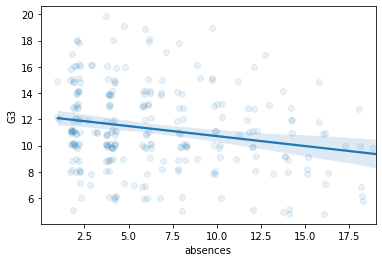

In [16]:
sns.regplot(data=math_students[(math_students['absences'] < 20) & (math_students.absences != 0) & (math_students.G3 != 0)]
            , y="G3", x="absences", y_jitter=0.2, x_jitter=0.3, scatter_kws={'alpha':0.1})

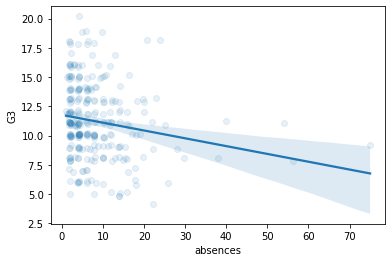

In [17]:
sns.regplot(data=math_students[(math_students.absences != 0) & (math_students.G3 != 0)]
            , y="G3", x="absences", y_jitter=0.2, x_jitter=0.3, scatter_kws={'alpha':0.1})

### Wnioski 
Istnieje korelacja między nieobecnością a wynikami ocen zarówno z matematyki jak i z portugalskiego. Zależność ta była jednak dopiero widoczna po usunięciu wpisów, które prawdopodobnie były niepożądane. Byly rekordy uczniów, których wynik z tesu bl równy 0 oraz nieobecności tez były równe 0. Dodatkowo, zauważyłem że uczniów z dużą liczbą nieobecności jest mało więc rekordy te mogą wprowadzać w błąd, dlatego skonstruowałem również wykres gdzie obciąłem skrajne przypadki.

## Osoby młodsze piją mniej alkoholu

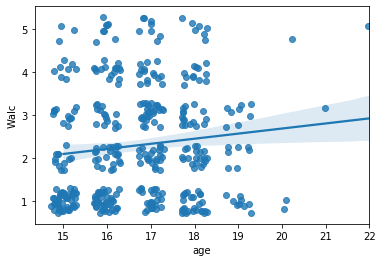

In [18]:
sns.regplot(data = math_students, x ='age', y = 'Walc', y_jitter=0.3, x_jitter=0.3)

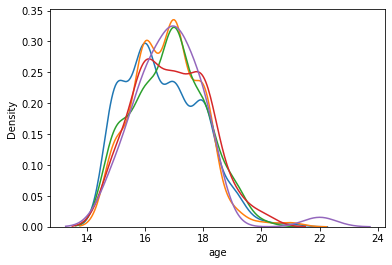

In [29]:
jobs = [1,2,3,4,5]
for job in jobs:
    # Subset to the airline
    subset = por_students[por_students['Walc'] == job]
    
    # Draw the density plot
    sns.distplot(subset['age'], hist = False, kde = True,
                 label = job)

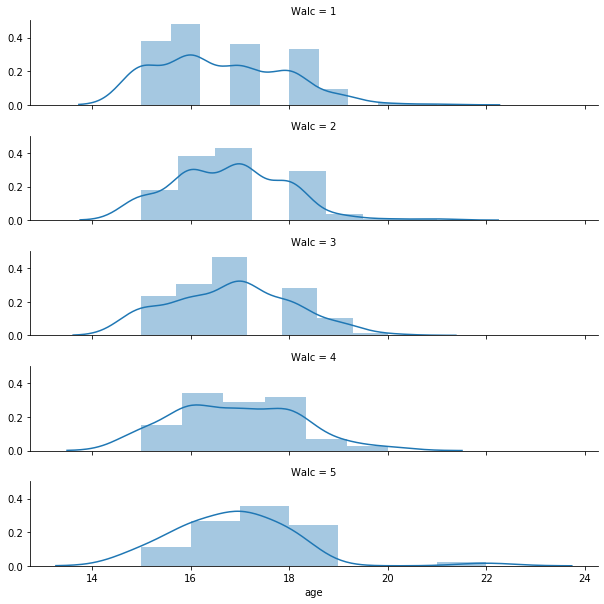

In [33]:
g = sns.FacetGrid(por_students, row="Walc", height=1.7, aspect=5,)
g.map(sns.distplot, "age", hist = True)

### Wnioski 
Trudno ocenić jednoznacznie czy hipoteza jest prawdziwa. Pierwszy wykres pokazuje, że istnieje corelacja pomiędzy wiekiem, a ilością spożywanego alkoholu. Nie jest to jednak przekonujący argument na tyle aby potwierdzić hipoteze. Następne wykresy przedstawiają rozkład osów w danym wieku, z podziałem na ilośc pitego alkoholu. Z wykresów widać delikatne przemieszczanie się krzywej na prawo, to pozwala nam twierdzić, że coś w tym jest.

## Uczeń otrzymuje lepsze wyniki jeżeli jego rodzic jest nauczycielem

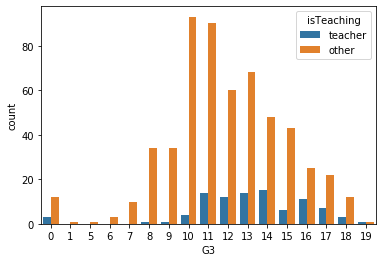

In [34]:
por_students['isTeaching'] = por_students.apply(lambda row: 'teacher' if row['Fjob'] == 'teacher' or row['Mjob'] == 'teacher' else 'other', axis=1)
sns.countplot(data = por_students, x ='G3', hue="isTeaching")

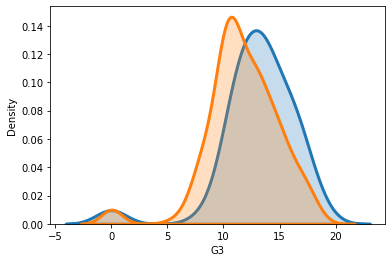

In [35]:
jobs = ['teacher', 'other']

for job in jobs:
    # Subset to the airline
    subset = por_students[por_students['isTeaching'] == job]
    
    # Draw the density plot
    sns.distplot(subset['G3'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = job)

### Wnioski 
Pierwszy wykres przedstawia prostu histogram, jednak trudno z niego coś wywnioskować. Drugi wykres natopiast pokazuje rozkład wyników uczniów z podziałem na zawód rodzica. Na niebiesko narysowani są uczniowe, których co najmniej jeden rodzic jest nauczycielem. Widać wyraźnie na wykresie, że niebieska krzywa jest przesunięta na prawo. To oznacza, że hipoteza jest prawdziwa. 

## Osoby z miasta częściej chcą zdobyć wyższe wykształcenie

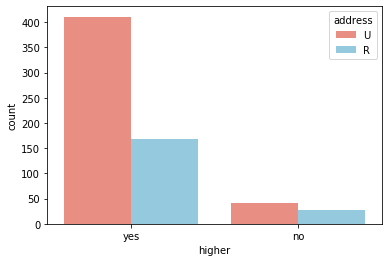

In [36]:
sns.countplot(data = por_students, x = "higher", hue= 'address', palette= ["salmon", "skyblue"])

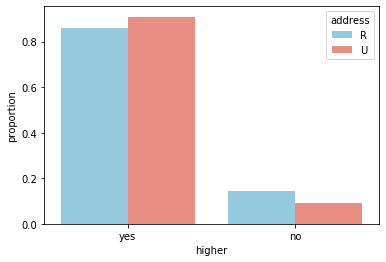

In [37]:
(por_students['higher']
 .groupby(por_students['address'])
 .value_counts(normalize=True)
 .rename('proportion')
 .reset_index()
 .pipe((sns.barplot, "data"), x='higher', y='proportion', hue='address', palette= ["skyblue","salmon"]))

### Wnioski 
Pierwszy wykres przedstawia liczbę uczniów chcących uzyskać wyższe wykształcenie z podziałem na miejsce zamieszkania. Jednak to drugi wykres mówi nam więcej. Pokazuje on procentowy podział uczniów chcących uzyskać wyższe wykształcenie. Równica na drugim wykresie jest niewielka, co oznacza, że hipoteza może, ale nie musi być prawdziwa.